In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import textract
from konlpy.tag import *
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import csv
%matplotlib inline

In [2]:
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)

In [3]:
twitter = Okt()

text = ""
morphs = []

df = pd.read_csv('adoor_data/sns_feed.csv', encoding='UTF8')

df.head()

,adoor,SNS,SNS 아이디,private,created_at,photo,content
0,2,facebook,김유리,False,2019/02/08,홍보,저와 팀원들이 영혼을 갈아넣은 서비스 베타버전이 드디어 나왔어요!!🤩\n밤잠을 줄여...
1,2,instagram,nnnyu_ri,False,2019/02/08,홍보,https://adoor.app @adoor.team\n저와 팀원들이 영혼을 갈아넣...
2,2,instagram,yulo_mon,True,2019/02/07,"가족, 아기, 강아지",카조꾸또 잇쇼니 토떼모 우레시깟딴데쓰
3,2,instagram,yulo_mon,True,2019/02/25,일상,🙋🏻‍♀️
4,2,instagram,yulo_mon,True,2019/03/02,나들이,필름캐머러 첫 롤 사진들1\n수라미가 준 로모그래피 심플유즈 기본 장착 컬러네거티브...


In [4]:
content = df.content
tags = df.photo

for row in content:
    text = row
    if not pd.isna(text):
        morphs.append(twitter.pos(text))
        
for row in tags:
    text = row
    if not pd.isna(text):
        morphs.append(twitter.pos(text))

In [5]:
print(morphs)

[[('저', 'Noun'), ('와', 'Josa'), ('팀', 'Noun'), ('원', 'Suffix'), ('들이', 'Verb'), ('영혼', 'Noun'), ('을', 'Josa'), ('갈아', 'Adverb'), ('넣은', 'Verb'), ('서비스', 'Noun'), ('베타', 'Noun'), ('버전', 'Noun'), ('이', 'Josa'), ('드디어', 'Adverb'), ('나왔어요', 'Verb'), ('!!', 'Punctuation'), ('🤩', 'Foreign'), ('\n', 'Foreign'), ('밤잠', 'Noun'), ('을', 'Josa'), ('줄여가며', 'Verb'), ('코피', 'Noun'), ('를', 'Josa'), ('흘려가며', 'Verb'), ('스카이', 'Noun'), ('캐슬', 'Noun'), ('도', 'Josa'), ('안보', 'Noun'), ('면서', 'Noun'), ('만들었어요', 'Verb'), ('~', 'Punctuation'), ('\n', 'Foreign'), ('꼭', 'Noun'), ('써', 'Verb'), ('보시', 'Noun'), ('고', 'Josa'), ('친구', 'Noun'), ('들', 'Suffix'), ('에게도', 'Josa'), ('많이', 'Modifier'), ('많이', 'Modifier'), ('공유', 'Noun'), ('해주세요', 'Verb'), ('🥰', 'Foreign'), ('\n', 'Foreign'), ('🌷', 'Foreign'), ('고생', 'Noun'), ('한', 'Josa'), ('팀원', 'Noun'), ('들', 'Suffix'), ('앞', 'Noun'), ('으로도', 'Josa'), ('함께', 'Adverb'), ('해', 'Noun'), ('요', 'Josa'), (',,,', 'Punctuation'), ('이수정', 'Noun'), ('구', 'Modifier'), ('진선', 'Noun

In [6]:
noun_adj_adv_list=[]
 
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun'] and len(word) > 1:
#         if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("그" not in word) and ("수"not in word) and("게"not in word)and("말"not in word)and("거" not in word) and ("생각" not in word) and ("사람" not in word):
            noun_adj_adv_list.append(word)

In [7]:
print(noun_adj_adv_list)

['영혼', '서비스', '베타', '버전', '밤잠', '코피', '스카이', '캐슬', '안보', '면서', '보시', '친구', '공유', '고생', '팀원', '이수정', '진선', '약간', '경이', '가경', '영혼', '서비스', '베타', '버전', '밤잠', '코피', '스카이', '캐슬', '안보', '면서', '보시', '친구', '공유', '쇼니', '토떼모', '우레', '데쓰', '필름', '캐머러', '사진', '라미', '로모그래피', '심플', '유즈', '기본', '장착', '컬러', '거티브', '필름', '으루', '믓진', '친구', '경우', '생각', '헤헤', '행벅', '자주', '라미', '필름', '캐머러', '사진', '이사', '마구', '초상권', '없슴네', '우리', '동아리', '운영', '내일', '위해', '운동장', '설치', '버스', '거기', '플래카드', '여러', '보고', '진짜', '고생', '갑자기', '버스', '운동장', '부터', '갑자기', '애가', '우산', '잡고', '여기', '저기', '그것', '아주', '다른', '처음', '약간', '우산', '손잡이', '우산', '도시', '착지', '줄타기', '아주', '줄타기', '천재', '핬다', '길이', '건너편', '선수', '그냥', '여자', '여자', '여자', '여자', '머리', '허리', '상태', '날갯짓', '점점', '위로', '상공', '위로', '진짜', '전깃줄', '전깃줄', '잡고', '가다가', '저택', '마당', '수영장', '거길', '점프', '수영장', '차로', '점프', '수석', '유리', '착지', '운전사', '다시', '저택', '창문', '거기', '악당', '애도', '따라서', '우리', '악당', '낌새', '우리', '여기저기', '커튼', '순간', '다시', '전깃줄', '잡고', '슬라이딩', '슝슝', '악당', '줄타기', '장인', '보고', 

In [9]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
wd = sorted(words.items(), key = lambda x:x[1], reverse = True)

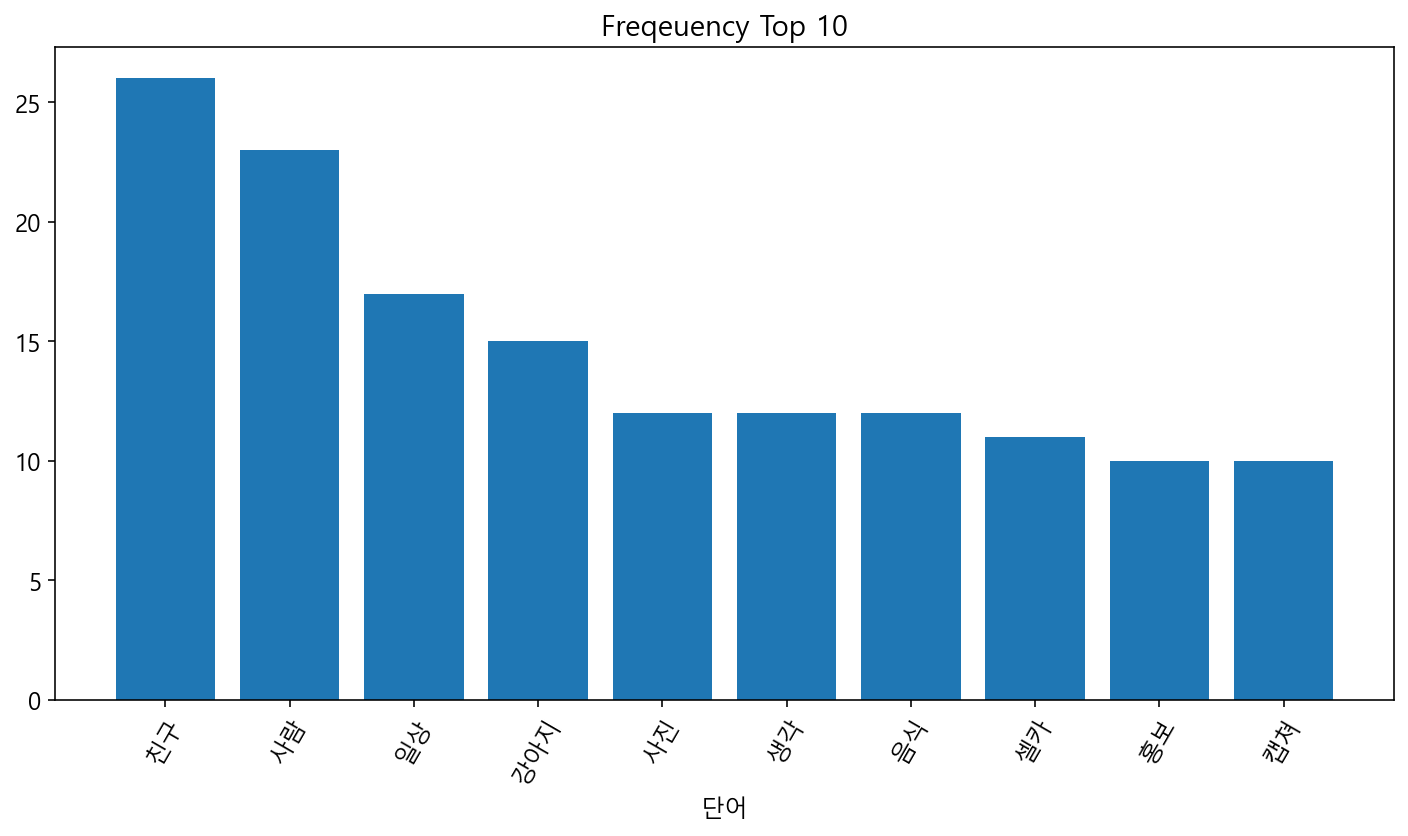

In [10]:
max = 10
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams["font.size"] = 12
plt.bar(range(max), [i[1] for i in wd[:max]])
plt.title('Freqeuency Top 10')
plt.xlabel('단어')
plt.xticks(range(max), [i[0] for i in wd[:max]], rotation=60)
plt.show()

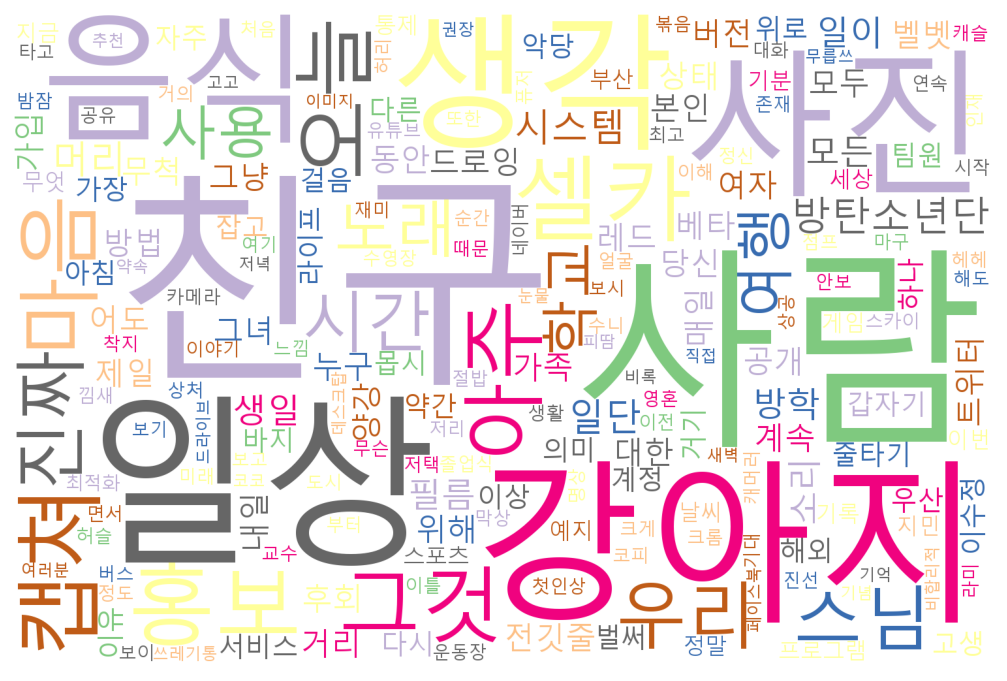

In [11]:
wordcloud = WordCloud(font_path = '~/Library/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()